In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py

from scipy import stats
from configs import census_api
from us_state_abbrev import states

# paths for saving
savefigdir = 'images/'
savedatadir = 'data/'

In [2]:
#import data from extracted sources from previous notebooks
df_Census = pd.read_csv('data/census_df.csv')
df_Crime = pd.read_csv('data/Crime_Results.csv')
df_location = pd.read_csv('data/crime_location.csv')
df_popchange = pd.read_csv('data/population_change.csv')
df_total_law = pd.read_csv('data/StateGunLawCountByYear.csv')
df_CrimeRate = pd.read_csv('data/crime_rate.csv')
df_LawSummary = pd.read_csv('data/StateGunLawCategories_2014-2018.csv')
piv_tot_sum_df = pd.read_csv('data/StateGunLawCountByYear.csv')
df_States = pd.DataFrame.from_dict(states, orient = 'index' ,columns = ['StateName']).reset_index()
years = ['2014','2015','2016','2017']
columns = ['index', '2014','2015','2016','2017']

# test df
df_Crime.head()


,index,state,2014,2015,2016,2017,avg,delta,Abs,text
0,SD,South Dakota,72.0,103.0,144.0,199.0,129.50,176.388889,176.388889,176.39%
1,AK,Alaska,146.0,380.0,445.0,317.0,322.00,117.123288,117.123288,117.12%
2,MA,Massachusetts,968.0,1338.0,1544.0,1761.0,1402.75,81.921488,81.921488,81.92%
3,MN,Minnesota,450.0,410.0,468.0,759.0,521.75,68.666667,68.666667,68.67%
4,IL,Illinois,3095.0,3456.0,5055.0,5089.0,4173.75,64.426494,64.426494,64.43%


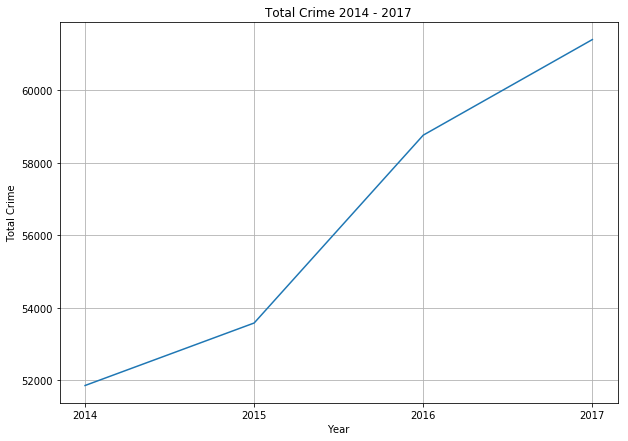

In [3]:
# create total column and plot line over 4 years of data for total crime
df_CrimeYears = df_Crime[columns].set_index('index').T.reset_index()
df_CrimeYears['total'] = df_CrimeYears.sum(axis = 1)
df_CrimeYears.head()

# set variables
x = df_CrimeYears['index']
y = df_CrimeYears['total']

# plot
plt.figure(figsize=(10,7))
plt.plot(x,y )
plt.title('Total Crime 2014 - 2017')
plt.xlabel('Year')
plt.xticks(years)
# plt.xticks(range(2014, 2018, 1), years)
plt.ylabel('Total Crime')
plt.grid()
plt.savefig(savefigdir+'Total Crime over Time.png')
plt.show()#


In [4]:
# create df with merged census data to be used for plotting crime vs pop
states = df_Crime['state']
color = ['r','b','g','y']
trendcolor = ['r--','b--','g--','y--']

#create merged df
df_Scat = df_Crime.merge(df_Census,how = 'left', left_on = 'state', right_on = 'State')
df_Scat.head()

,index,state,2014,2015,2016,2017,avg,delta,Abs,text,State,State Number,2013 Population,2014 Population,2015 Population,2016 Population,2017 Population
0,SD,South Dakota,72.0,103.0,144.0,199.0,129.50,176.388889,176.388889,176.39%,South Dakota,46.0,825198.0,834708.0,843190.0,851058.0,861542.0
1,AK,Alaska,146.0,380.0,445.0,317.0,322.00,117.123288,117.123288,117.12%,Alaska,2.0,720316.0,728300.0,733375.0,736855.0,741522.0
2,MA,Massachusetts,968.0,1338.0,1544.0,1761.0,1402.75,81.921488,81.921488,81.92%,Massachusetts,25.0,6605058.0,6657291.0,6705586.0,6742143.0,6823721.0
3,MN,Minnesota,450.0,410.0,468.0,759.0,521.75,68.666667,68.666667,68.67%,Minnesota,27.0,5347740.0,5383661.0,5419171.0,5450868.0,5525050.0
4,IL,Illinois,3095.0,3456.0,5055.0,5089.0,4173.75,64.426494,64.426494,64.43%,Illinois,17.0,12848554.0,12868747.0,12873761.0,12851684.0,12835726.0


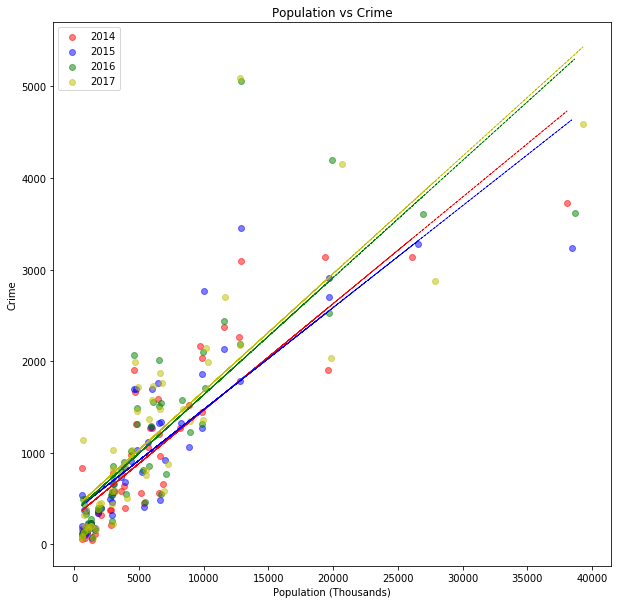

In [5]:
# plot new df to show population vs crime for each year
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

for year in years:
    y = df_Scat[year].values
    x = df_Scat[f'{year} Population'].values/1000
    #print(f'{year},{x},{y}')
    #print(x)
    #print(y)
    ax.scatter(x, y , c = color[years.index(year)], alpha = 0.5,label = year)
    # calc the trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),color[years.index(year)], linewidth =.75, linestyle='dashed')
ax.legend()
plt.title("Population vs Crime")
plt.xlabel("Population (Thousands)")
plt.ylabel("Crime")
plt.savefig(savefigdir+'Population vs Crime.png')
plt.show()
#plt.figure(figsize=(5,10))


In [6]:
# create a map of the US with the change in crimes pct in each state
# used plotly for this

scl = [[0.0, '#007F00'],[0.25,'#F5F5F5'],[0.75,'#ffb9b9'],[1.0,'#C21807']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_Crime['index'],
        z = df_Crime['delta'].astype(int),
        locationmode = 'USA-states',
        text = df_Crime['text'],
        hoverinfo = 'text+location',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Percentage")
        ) ]

layout = dict(
        title = '2014 - 2017 Change in Gun Crime Rate',
    
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
# py.io.write_image(fig, 'images/Gun Crime Change.png')
py.plotly.iplot( fig, filename='2014 - 2017 Change in Gun Crime Rate' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~mmoscater/0 or inside your plot.ly account where it is named '2014 - 2017 Change in Gun Crime Rate'


In [7]:
#plot a heat map of the crimes in 2017 using the long lat provided
scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_location['longitude'],
        lat = df_location['latitude'],
        #text = df['text'],
        mode = 'markers',
        marker = dict(
            size = 2,
            opacity = 0.2,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=.25,
                color='rgba(102, 102, 102)'
            ),
            #colorscale = scl,
            #cmin = 0,
            #color = df['cnt'],
            #cmax = df['cnt'].max(),
            
        ))]

layout = dict(
        title = '2017 Gun Crimes by Location',
        
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
# py.io.write_image(fig, savefigdir+'2017 Gun Crimes by Location.png')
py.plotly.iplot( fig, validate=False, filename='2017 Gun Crimes by Location' )

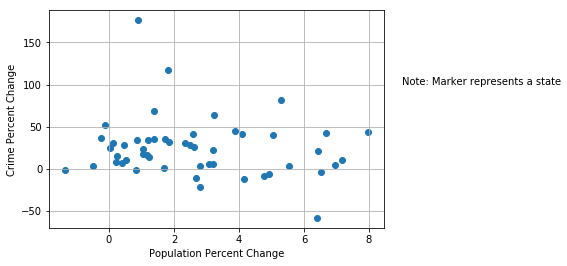

LinregressResult(slope=-2.288490576872784, intercept=30.811322683185786, rvalue=-0.15210736480610962, pvalue=0.28662736864922284, stderr=2.124309317471235)

In [8]:
#create scatter pot to show relation between population change and crime change
plt.scatter(df_popchange['Percent Change'], df_Crime['delta'])
plt.xlabel('Population Percent Change')
plt.ylabel('Crime Percent Change')
#plt.legend(['State'])
plt.text(9,100,'Note: Marker represents a state')
plt.grid()
#plt.show()

#Observation Population increase does not correlate with increased crime.
plt.savefig(savefigdir+"crime_pop_scatterplot")
plt.show()
test = stats.linregress(df_popchange['Percent Change'], df_Crime['delta'])
test

In [9]:
# check df_CrimeRate
df_CrimeRate.head()

,State,0
0,AK,42.749912
1,AL,30.058358
2,AR,27.440984
3,AZ,8.496605
4,CA,11.675347


In [10]:
# merge state acronyms into total law df
df_total_law.head()
df_total_law = df_total_law.merge(df_States, how = 'left', left_on = 'state', right_on = 'StateName')
df_total_law.head()

,state,2014,2015,2016,2017,2018,index,StateName
0,Alabama,10,8,8,8,8,AL,Alabama
1,Alaska,3,3,3,3,3,AK,Alaska
2,Arizona,5,5,5,5,5,AZ,Arizona
3,Arkansas,11,11,11,11,11,AR,Arkansas
4,California,82,84,86,88,91,CA,California


In [11]:
# merge with the crime data
crime_rate_vslaw = df_total_law.merge(df_CrimeRate, how = 'left',  left_on = 'index', right_on = 'State')

crime_rate_vslaw.head()

,state,2014,2015,2016,2017,2018,index,StateName,State,0
0,Alabama,10,8,8,8,8,AL,Alabama,AL,30.058358
1,Alaska,3,3,3,3,3,AK,Alaska,AK,42.749912
2,Arizona,5,5,5,5,5,AZ,Arizona,AZ,8.496605
3,Arkansas,11,11,11,11,11,AR,Arkansas,AR,27.440984
4,California,82,84,86,88,91,CA,California,CA,11.675347


In [12]:
# calculate per capita x100k
crime_rate_vslaw = crime_rate_vslaw.rename(columns = {'0':"Crime Rate per 100,000"})
crime_rate_vslaw.head()

,state,2014,2015,2016,2017,2018,index,StateName,State,"Crime Rate per 100,000"
0,Alabama,10,8,8,8,8,AL,Alabama,AL,30.058358
1,Alaska,3,3,3,3,3,AK,Alaska,AK,42.749912
2,Arizona,5,5,5,5,5,AZ,Arizona,AZ,8.496605
3,Arkansas,11,11,11,11,11,AR,Arkansas,AR,27.440984
4,California,82,84,86,88,91,CA,California,CA,11.675347


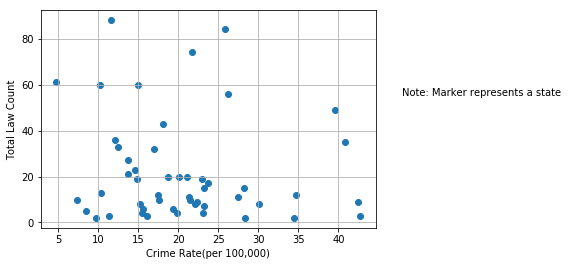

LinregressResult(slope=-0.04954402703865801, intercept=21.662522985708264, rvalue=-0.12226840891523931, pvalue=0.3976191098136338, stderr=0.05804778579117285)

In [13]:
#plot law counts vs crime rate per capita-100k
plt.ylabel('Total Law Count')
plt.xlabel('Crime Rate(per 100,000)')
plt.text(48,55,'Note: Marker represents a state')
plt.scatter(crime_rate_vslaw['Crime Rate per 100,000'],crime_rate_vslaw['2017'])
plt.grid()
plt.savefig(savefigdir+'crime_ratevslawgrid.png')

plt.show()
linear_regression = stats.linregress(crime_rate_vslaw['2017'],crime_rate_vslaw['Crime Rate per 100,000'])
linear_regression

In [14]:
#create 2014 df
df_2014 = df_LawSummary.loc[df_LawSummary['year']==2014]
df_2015 = df_LawSummary.loc[df_LawSummary['year']==2015]
df_2016 = df_LawSummary.loc[df_LawSummary['year']==2016]
df_2017 = df_LawSummary.loc[df_LawSummary['year']==2017]
print(list(df_2017))

df_2017.head()

['year', 'state', 'Dealer regulations_Total', 'Buyer regulations_Total', 'Prohibitions for high-risk gun possession_Total', 'Background checks_Total', 'Ammunition regulations_Total', 'Possession regulations_Total', 'Concealed carry permitting_Total', 'Assault weapons and large-capacity magazines_Total', 'Child access prevention_Total', 'Gun trafficking_Total', 'Stand your ground_Total', 'Preemption_Total', 'Immunity_Total', 'Domestic violence_Total']


,year,state,Dealer regulations_Total,Buyer regulations_Total,Prohibitions for high-risk gun possession_Total,Background checks_Total,Ammunition regulations_Total,Possession regulations_Total,Concealed carry permitting_Total,Assault weapons and large-capacity magazines_Total,Child access prevention_Total,Gun trafficking_Total,Stand your ground_Total,Preemption_Total,Immunity_Total,Domestic violence_Total
150,2017,Alabama,1,0,3,0,0,0,4,0,0,0,0,0,0,2
151,2017,Alaska,0,1,1,0,0,1,0,0,0,0,0,0,0,0
152,2017,Arizona,0,0,4,0,0,1,0,0,0,0,0,0,0,3
153,2017,Arkansas,0,0,3,0,0,2,5,0,0,0,1,0,0,0
154,2017,California,14,12,7,11,4,7,6,8,9,6,1,2,1,18


In [15]:
# create a list to use for a loop to generate categories by state
# list of headers
hlist = list(df_2017)

# remove year and state from list
# rlist = ['year','state']
hlist.remove('year')
hlist.remove('state')
print(hlist)
print(len(hlist))

['Dealer regulations_Total', 'Buyer regulations_Total', 'Prohibitions for high-risk gun possession_Total', 'Background checks_Total', 'Ammunition regulations_Total', 'Possession regulations_Total', 'Concealed carry permitting_Total', 'Assault weapons and large-capacity magazines_Total', 'Child access prevention_Total', 'Gun trafficking_Total', 'Stand your ground_Total', 'Preemption_Total', 'Immunity_Total', 'Domestic violence_Total']
14


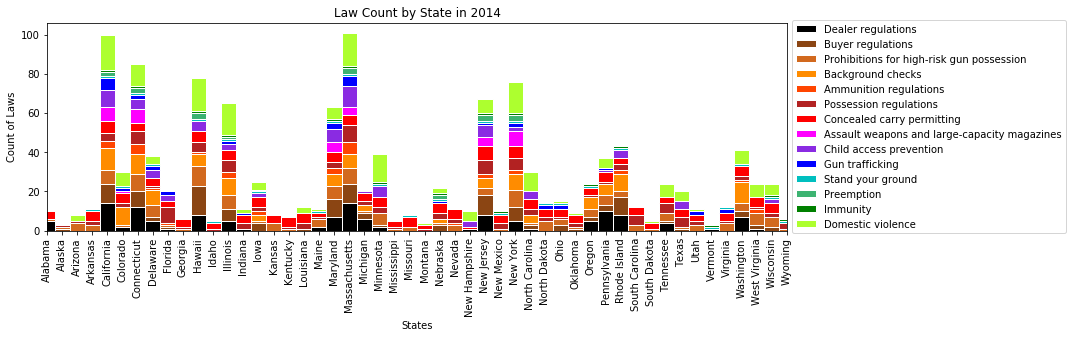

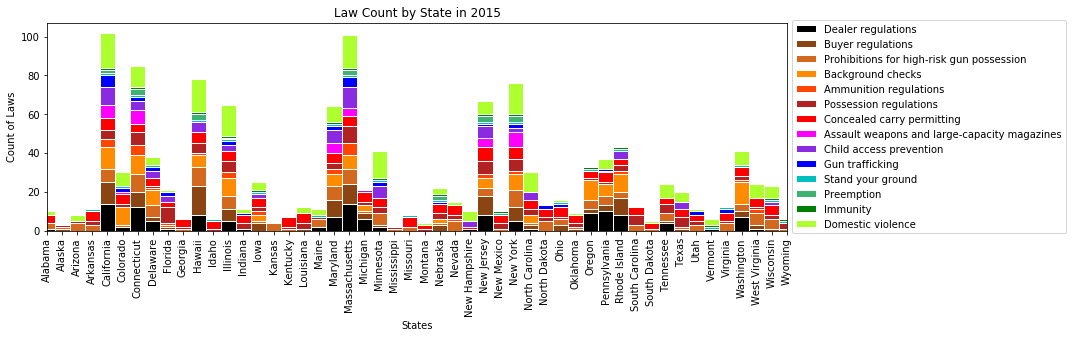

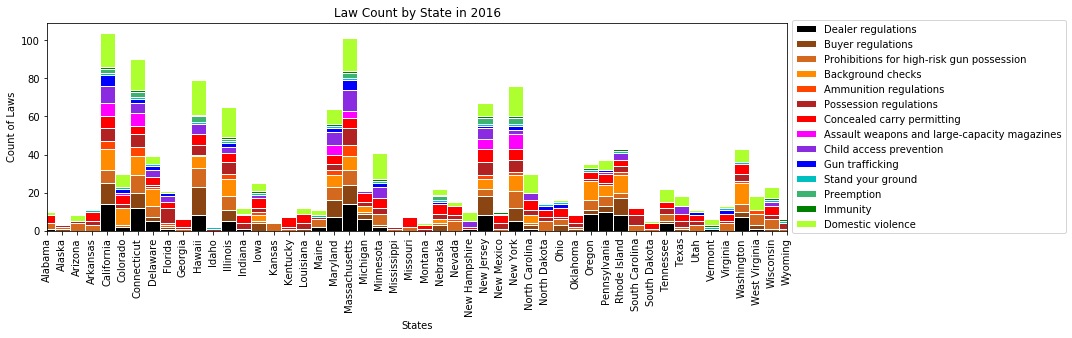

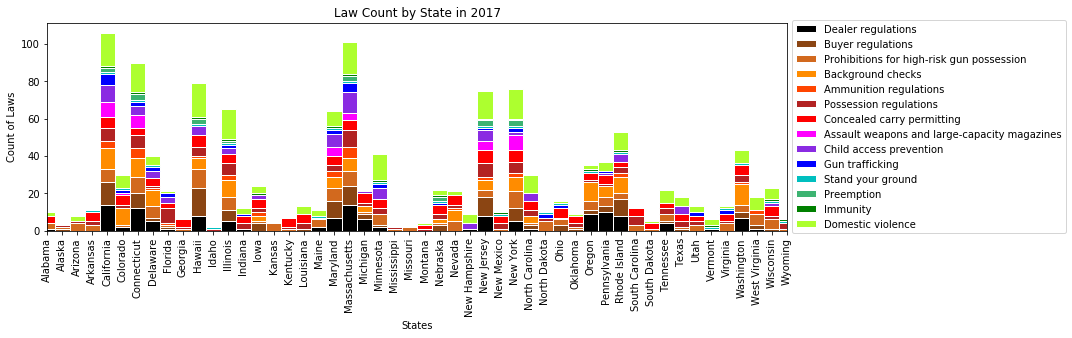

In [16]:
# create a stacked bar chart (categories) of the states gunlaws for each year
# create list of df to loop
dflist = [df_2014,df_2015,df_2016,df_2017]

#set filename as var for use in loop
fname = "Law Count by State in "

#set year to insert into file name
year = 2014

#iterate through list for each dataframe to plot stacked chart
for df in dflist:
    cat1 = df[hlist[0]]
    cat2 = df[hlist[1]]
    cat3 = df[hlist[2]]
    cat4 = df[hlist[3]]
    cat5 = df[hlist[4]]
    cat6 = df[hlist[5]]
    cat7 = df[hlist[6]]
    cat8 = df[hlist[7]]
    cat9 = df[hlist[8]]
    cat10 = df[hlist[9]]
    cat11 = df[hlist[10]]
    cat12 = df[hlist[11]]
    cat13 = df[hlist[12]]
    cat14 = df[hlist[13]]
    
    # remove _Total in the header list for legend
    lgroup=[l.replace('_Total','') for l in hlist]
    
    # plot fig -- remember to add each category to the previous for bottom margin or they overwrite
    plt.figure(figsize=(15,4.8))
    plt.bar(df['state'],cat1,color='black',edgecolor='white',width=1)
    plt.bar(df['state'],cat2,bottom=cat1,color='saddlebrown',edgecolor='white',width=1)
    plt.bar(df['state'],cat3,bottom=cat2+cat1,color='chocolate',edgecolor='white',width=1)
    plt.bar(df['state'],cat4,bottom=cat3+cat2+cat1,color='darkorange',edgecolor='white',width=1)
    plt.bar(df['state'],cat5,bottom=cat4+cat3+cat2+cat1,color='orangered',edgecolor='white',width=1)
    plt.bar(df['state'],cat6,bottom=cat5+cat4+cat3+cat2+cat1
            ,color='firebrick',edgecolor='white',width=1)
    plt.bar(df['state'],cat7,bottom=cat6+cat5+cat4+cat3+cat2+cat1
            ,color='red',edgecolor='white',width=1)
    plt.bar(df['state'],cat8,bottom=cat7+cat6+cat5+cat4+cat3+cat2+cat1
            ,color='magenta',edgecolor='white',width=1)
    plt.bar(df['state'],cat9,bottom=cat8+cat7+cat6+cat5+cat4+cat3+cat2+cat1
            ,color='blueviolet',edgecolor='white',width=1)
    plt.bar(df['state'],cat10,bottom=cat9+cat8+cat7+cat6+cat5+cat4+cat3+cat2+cat1
            ,color='blue',edgecolor='white',width=1)
    plt.bar(df['state'],cat11,bottom=cat10+cat9+cat8+cat7+cat6+cat5+cat4+cat3+cat2+cat1
            ,color='c',edgecolor='white',width=1)
    plt.bar(df['state'],cat12,bottom=cat11+cat10+cat9+cat8+cat7+cat6+cat5+cat4+cat3+cat2+cat1
            ,color='mediumseagreen',edgecolor='white',width=1)
    plt.bar(df['state'],cat13,bottom=cat12+cat11+cat10+cat9+cat8+cat7+cat6+cat5+cat4+cat3+cat2+cat1
            ,color='green',edgecolor='white',width=1)
    plt.bar(df['state'],cat14,bottom=cat13+cat12+cat11+cat10+cat9+cat8+cat7+cat6+cat5+cat4+cat3+cat2+cat1
            ,color='greenyellow',edgecolor='white',width=1)
    plt.xticks(rotation=90)
    plt.title(fname + str(year))
    plt.xlabel('States')
    plt.ylabel('Count of Laws')
    plt.xlim('Alabama','Wyoming')
    plt.legend(lgroup,loc='center left',bbox_to_anchor=(1,0.5))
    plt.tight_layout()
    plt.savefig(savefigdir+fname + str(year),frameon=True)
    year = year+1
   

In [17]:
# create year over change columns
piv_tot_sum_df['Change2015'] = piv_tot_sum_df['2014']-piv_tot_sum_df['2015']
piv_tot_sum_df['Change2016'] = piv_tot_sum_df['2015']-piv_tot_sum_df['2016']
piv_tot_sum_df['Change2017'] = piv_tot_sum_df['2016']-piv_tot_sum_df['2017']
piv_tot_sum_df['ChangeTotal'] = piv_tot_sum_df['2014']-piv_tot_sum_df['2017']

#set to new df for manipulation
df_years = piv_tot_sum_df
df_years.to_csv('data/Change_in_law.csv')

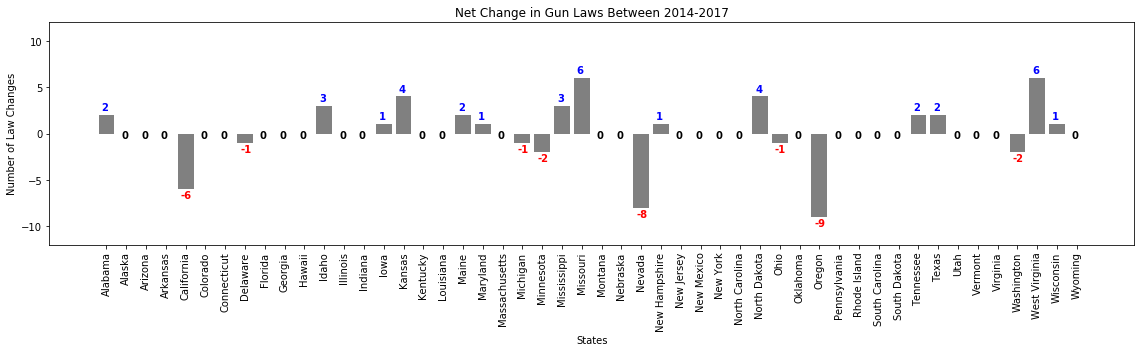

In [18]:
# plot changes over year
# include counts because pos and neg bars strech across the xaxis
plt.figure(figsize=(16,5))
plt.bar(df_years['state'],df_years['ChangeTotal'],color='grey')
plt.xticks(rotation=90)
plt.title("Net Change in Gun Laws Between 2014-2017")
# plt.xlim('Alabama','Wyoming')
plt.ylim(-12,12)
plt.xlabel('States')
plt.ylabel('Number of Law Changes')
# create counts to add to plot
for i, c in enumerate(df_years['ChangeTotal']):
    if c < 0:
        txt = c-1
        color='red'
    elif c > 0:
        txt = c+.5
        color='blue'
    else:
        txt=-0.5
        color='black'
    plt.text(i-.25,txt,str(c), color=color, fontweight='bold')
plt.tight_layout()
plt.savefig(savefigdir+'Net Change in Gun Laws.png')
plt.show()

In [19]:
#check df that was used for abbrev
df_States.head()

,index,StateName
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AS,American Samoa
4,AZ,Arizona


In [20]:
# compare crimes to gun laws
# import crime data
crimedf = pd.read_csv('data/Crime_Results.csv')
crimedf.head()

#get statename
abbv = df_States
abbv.head()
statecrime_df =crimedf.merge(abbv, how="left",left_on ="index", right_on="index")
statecrime_df.head()
statecrimes=statecrime_df.sort_values('StateName')
statecrimes.head()

#drop DC because its not on the laws
statecrimes = statecrimes.loc[statecrimes['index']!='DC']

#check before and after
print(statecrimes.shape)
print(df_years.shape)

(50, 11)
(50, 10)


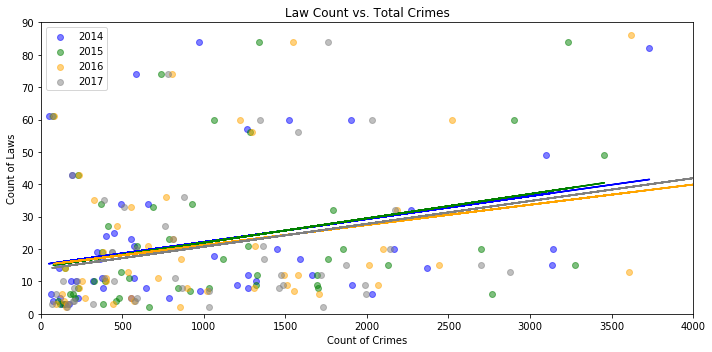

In [21]:
# create scatter plot comparing laws vs crime for each year

# set variables to save hands
x1=statecrimes['2014']
y1=df_years['2014']
x2=statecrimes['2015']
y2=df_years['2015']
x3=statecrimes['2016']
y3=df_years['2016']
x4=statecrimes['2017']
y4=df_years['2017']

#plot
plt.figure(figsize=(10,5))
plt.scatter(x1,y1,alpha=.5,color='blue')
plt.scatter(x2,y2,alpha=.5,color='green')
plt.scatter(x3,y3,alpha=.5,color='orange')
plt.scatter(x4,y4,alpha=.5,color='grey')

#create trendline for each year
z1= np.polyfit(x1,y1,1)
p1= np.poly1d(z1)
z2= np.polyfit(x2,y2,1)
p2= np.poly1d(z2)
z3= np.polyfit(x3,y3,1)
p3= np.poly1d(z3)
z4= np.polyfit(x4,y4,1)
p4= np.poly1d(z4)

plt.plot(x1,p1(x1),color='blue')
plt.plot(x2,p2(x2),color='green')
plt.plot(x3,p3(x3),color='orange')
plt.plot(x4,p4(x4),color='grey')

#plot details
plt.title('Law Count vs. Total Crimes')
plt.xlim(0,4000)
plt.ylim(0,90)
plt.ylabel('Count of Laws')
plt.xlabel('Count of Crimes')
plt.legend()
plt.tight_layout()
plt.savefig(savefigdir+'Law Count vs. Total Crimes.png')
plt.show()